# playing around

In [1]:
print("Hello world")

Hello world


# imports

In [2]:
#math
import numpy as np
import scipy as sp

#import
import os
import csv
import re
from collections import Counter

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

In [3]:
from sklearn.preprocessing import OneHotEncoder as OHC

# Playing

# Sici import

find all files

In [173]:
file_dir = "D:/tmp/Real/"
#file_dir = "../data/Simul"
file_names = []
for entry in os.scandir(file_dir):
    if entry.is_file():
#         print(int(re.findall(r'\d+', entry.name)[0]))
#         print(entry.name)
        file_names.append(os.path.join(file_dir, entry.name))
print(file_names)

['D:/tmp/Real/RealMeasurement1.csv', 'D:/tmp/Real/RealMeasurement10.csv', 'D:/tmp/Real/RealMeasurement11.csv', 'D:/tmp/Real/RealMeasurement2.csv', 'D:/tmp/Real/RealMeasurement3.csv', 'D:/tmp/Real/RealMeasurement4.csv', 'D:/tmp/Real/RealMeasurement5.csv', 'D:/tmp/Real/RealMeasurement6.csv', 'D:/tmp/Real/RealMeasurement7.csv', 'D:/tmp/Real/RealMeasurement9.csv']


import selected filename

In [175]:
n = 0
print(file_names[n])
arr = []

with open(file_names[n]) as dat_f:
    reader = csv.DictReader(dat_f, delimiter=";")
    for row in reader:
        arr.append(row)
    print(reader.fieldnames)

D:/tmp/Real/RealMeasurement1.csv
['Time', 'N1_i3', 'N1_ai3', 'N1_i1', 'N1_ai1', 'N1_P4', 'N1_Q4', 'N1_P3', 'N1_Q3', 'N1_i2', 'N1_ai2', 'N1_i4', 'N1_ai4', 'N1_P1', 'N1_Q1', 'N1_P2', 'N1_Q2', 'N1_r', 'N1_u', 'N1_au', 'N1_f', 'N1_i3', 'N1_ai3', 'N1_i1', 'N1_ai1', 'N1_i2', 'N1_ai2', 'N1_i4', 'N1_ai4', 'N1_u', 'N1_au', 'N4_i2', 'N4_ai2', 'N4_i3', 'N4_ai3', 'N4_i4', 'N4_ai4', 'N4_i1', 'N4_ai1', 'N4_u', 'N4_au', 'N2_i1', 'N2_ai1', 'N2_i5', 'N2_ai5', 'N2_i6', 'N2_ai6', 'N2_i4', 'N2_ai4', 'N2_i3', 'N2_ai3', 'N2_i2', 'N2_ai2', 'N2_u', 'N2_au', 'N10_u', 'N10_au', 'N10_i1', 'N10_ai1', 'N10_i2', 'N10_ai2', 'N10_i4', 'N10_ai4', 'N10_i3', 'N10_ai3']


format into plottable data

In [176]:
data = dict()
time_arr = []
err_i = 0
for key in arr[0]:
     data[key] = np.zeros(len(arr))

for i,line in enumerate(arr):
    for key in arr[0]:
        if key == 'Time':
            t = datetime.strptime(line[key], '%Y-%m-%d %H:%M:%S.%f')
            t = t - datetime(2017,1,1)
            t = t.total_seconds()
            time_arr.append(t)
        else:
            try:
                data[key][i] = float(line[key])
            except ValueError:
                #print(i, "'"+line[key]+"'")
                data[key][i] = 'NaN'
                err_i += 1
print(err_i)

0


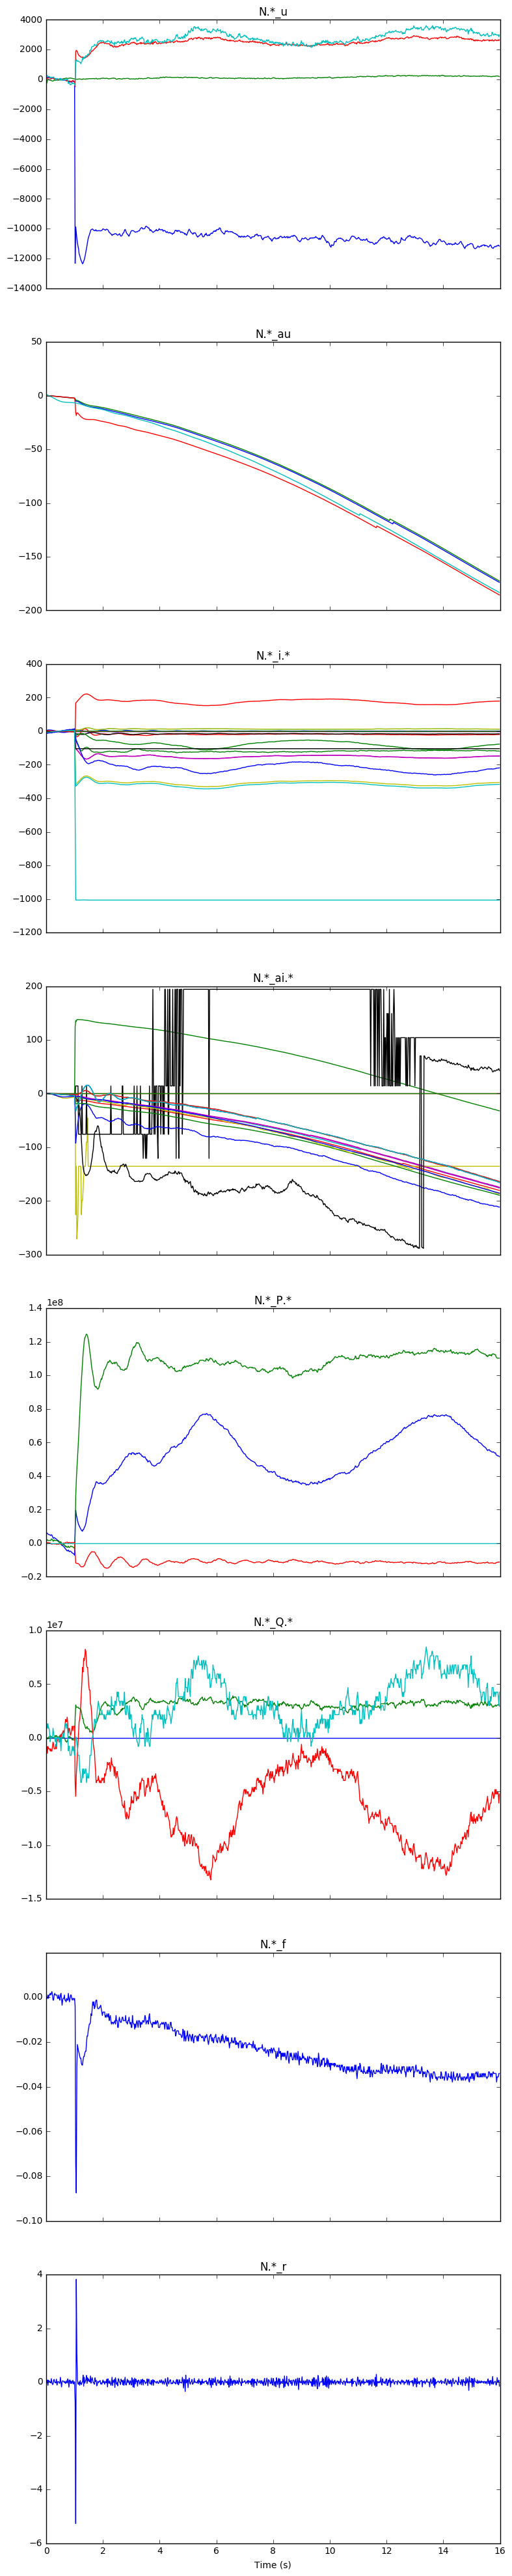

In [177]:
regex_vzorec = ["N.*_u", "N.*_au", "N.*_i.*", "N.*_ai.*", "N.*_P.*", "N.*_Q.*", "N.*_f", "N.*_r"]

f, axarr = plt.subplots(len(regex_vzorec), sharex=True, figsize=(9,50))
#plt.suptitle(file_names[n])
# axarr[0].plot(x, y)
# axarr[0].set_title('Sharing X axis')
# axarr[1].scatter(x, y)

for i, vzorec in enumerate(regex_vzorec):
    reg = re.compile(vzorec)

    plt_keys = list(filter(reg.match, data.keys()))


    

    for key in plt_keys:
        if vzorec.split('_')[1][0] == 'a':
            y = np.unwrap(data[key]-np.mean(data[key][0:10]), discont=359)
        else:
            y = data[key]-np.mean(data[key][0:50])
        axarr[i].plot(time_arr, y, '-', label=key)
        axarr[i].set_title(vzorec)
        
    
plt.xlabel("Time (s)")
plt.savefig('graphs %.0f.png' %n)

    
#plt.legend()
plt.show()

# Phase diagrams?

In [170]:
file_dir = "D:/tmp/Real/"
#file_dir = "../data/Simul"
file_names = []
for entry in os.scandir(file_dir):
    if entry.is_file():
#         print(int(re.findall(r'\d+', entry.name)[0]))
#         print(entry.name)
        file_names.append(os.path.join(file_dir, entry.name))
print(file_names)

['D:/tmp/Real/RealMeasurement1.csv', 'D:/tmp/Real/RealMeasurement10.csv', 'D:/tmp/Real/RealMeasurement11.csv', 'D:/tmp/Real/RealMeasurement2.csv', 'D:/tmp/Real/RealMeasurement3.csv', 'D:/tmp/Real/RealMeasurement4.csv', 'D:/tmp/Real/RealMeasurement5.csv', 'D:/tmp/Real/RealMeasurement6.csv', 'D:/tmp/Real/RealMeasurement7.csv', 'D:/tmp/Real/RealMeasurement9.csv']


RealMeasurement1


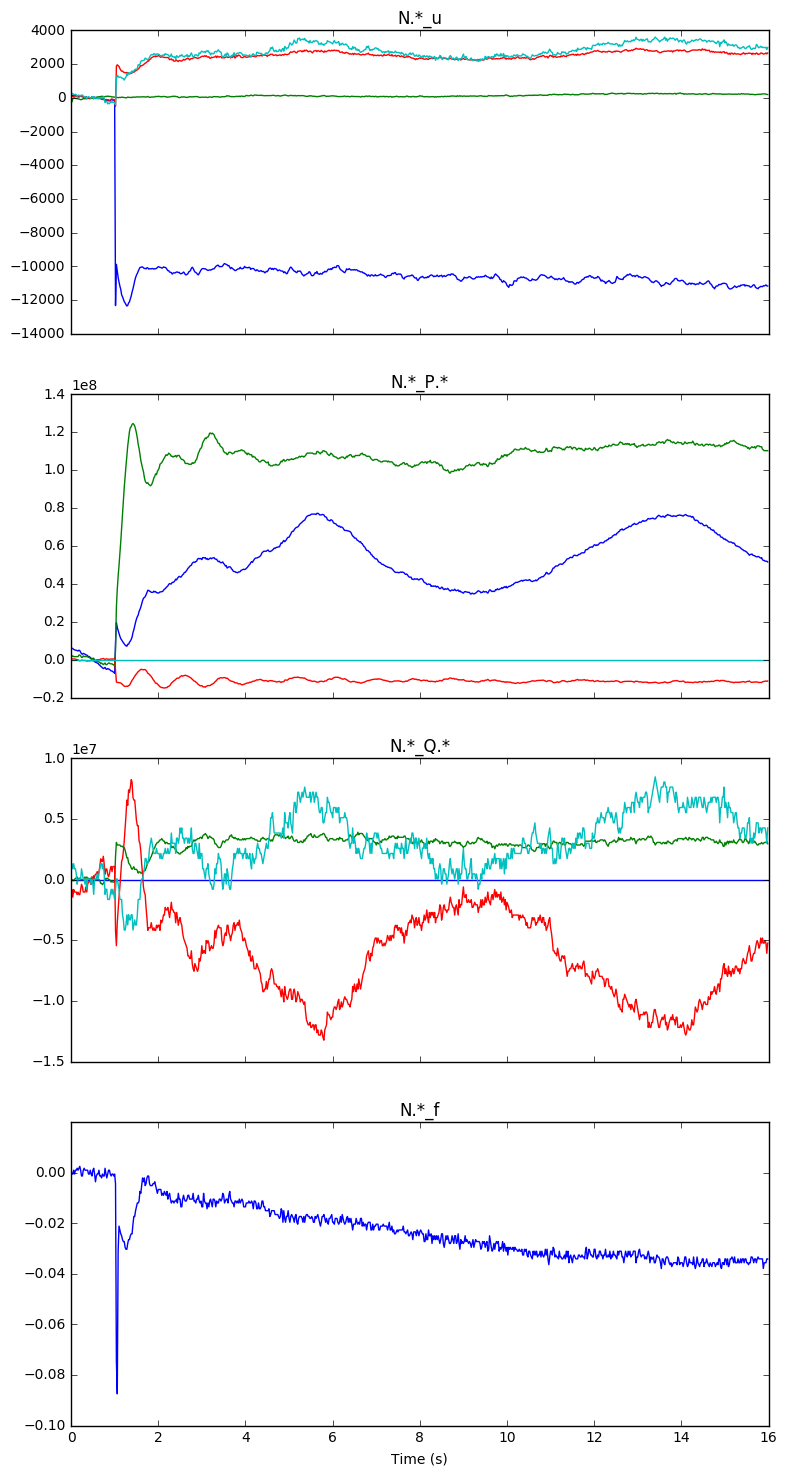

RealMeasurement10


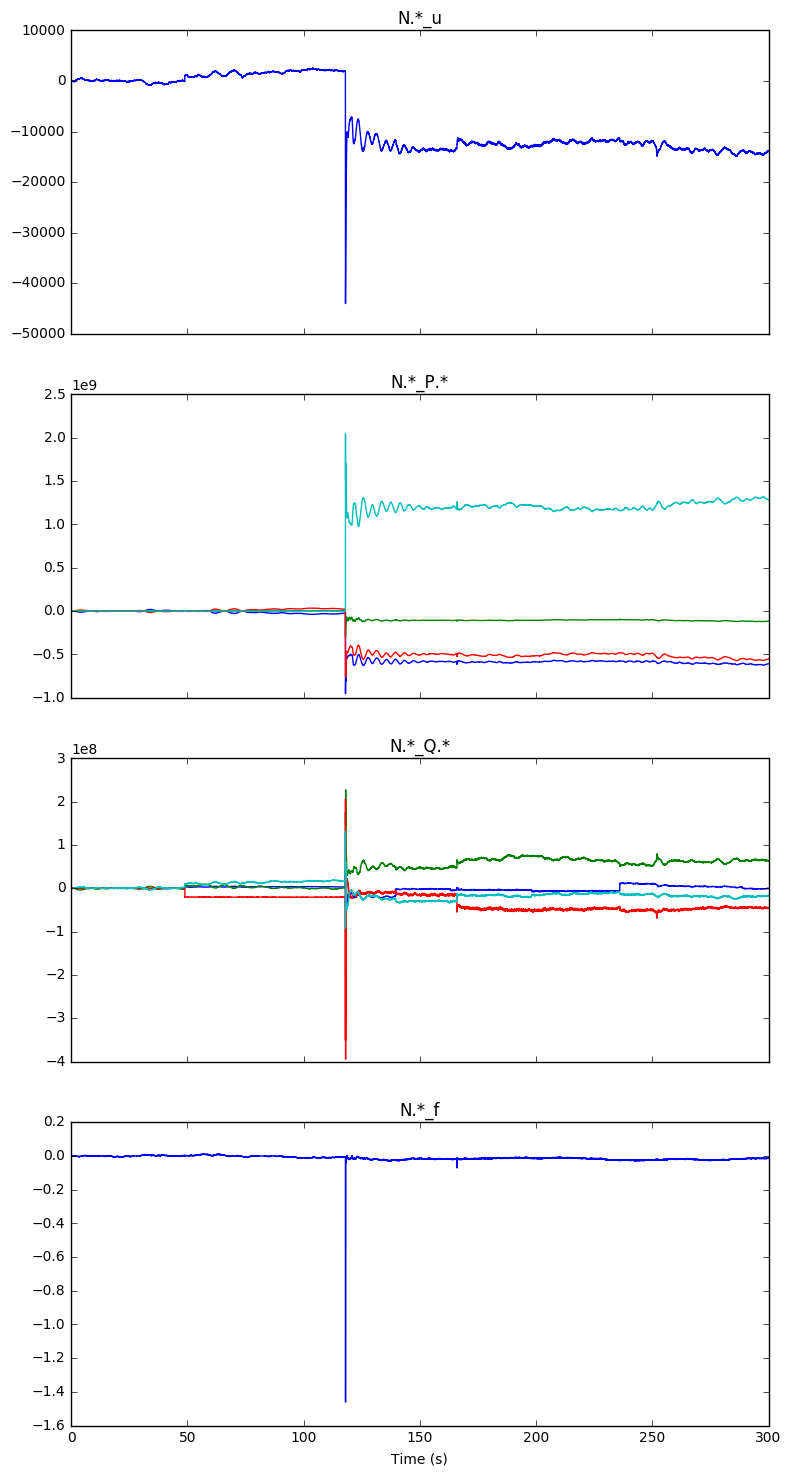

RealMeasurement11


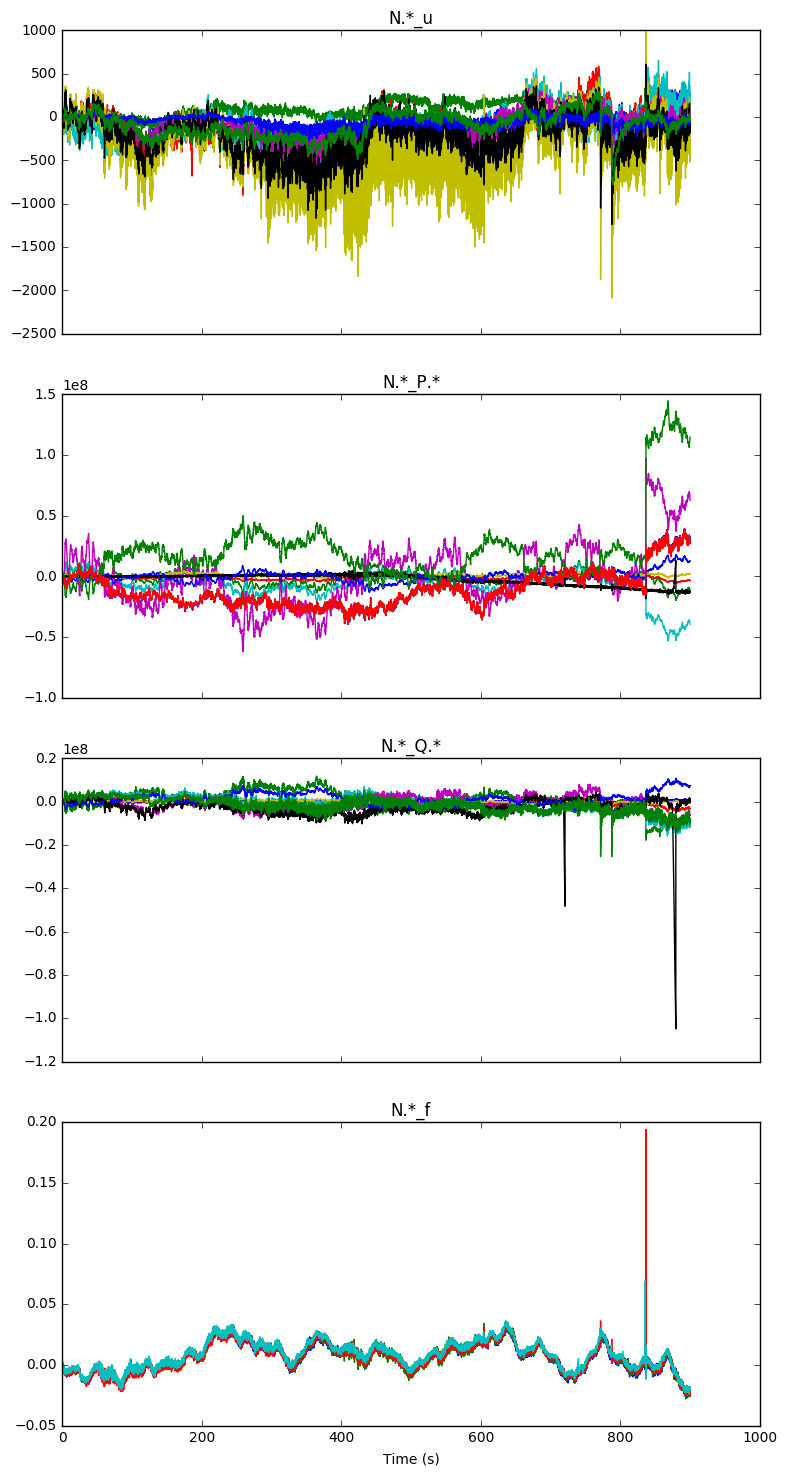

RealMeasurement2


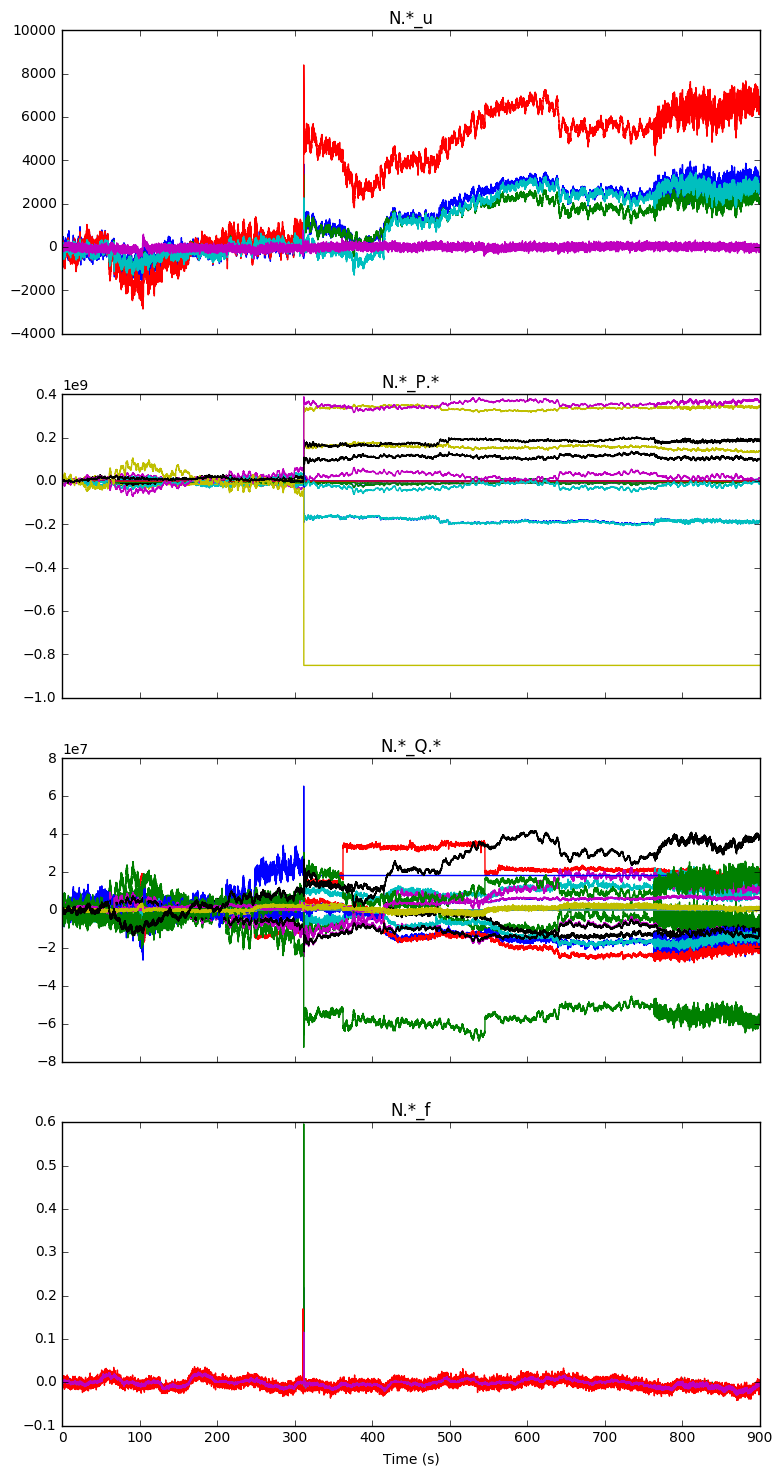

RealMeasurement3


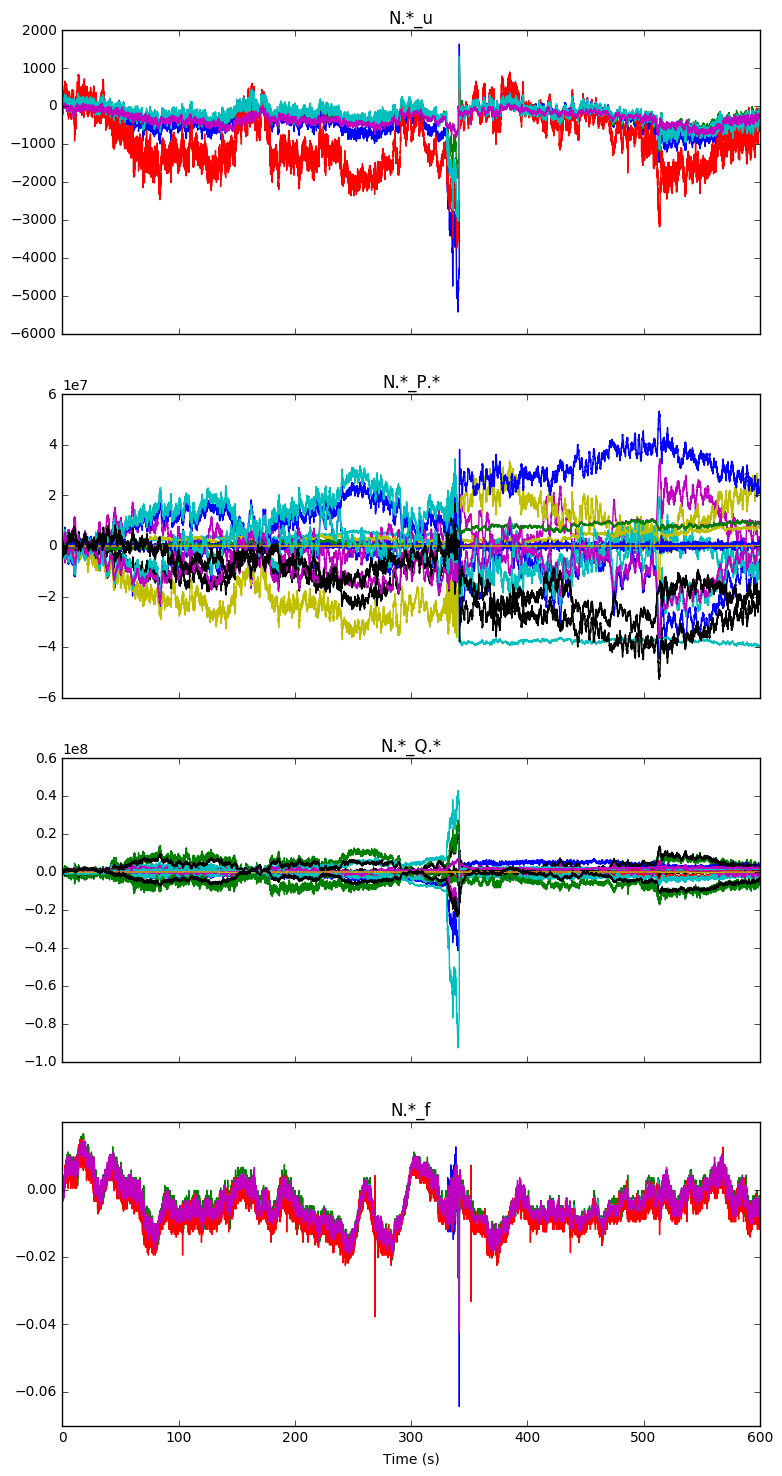

RealMeasurement4


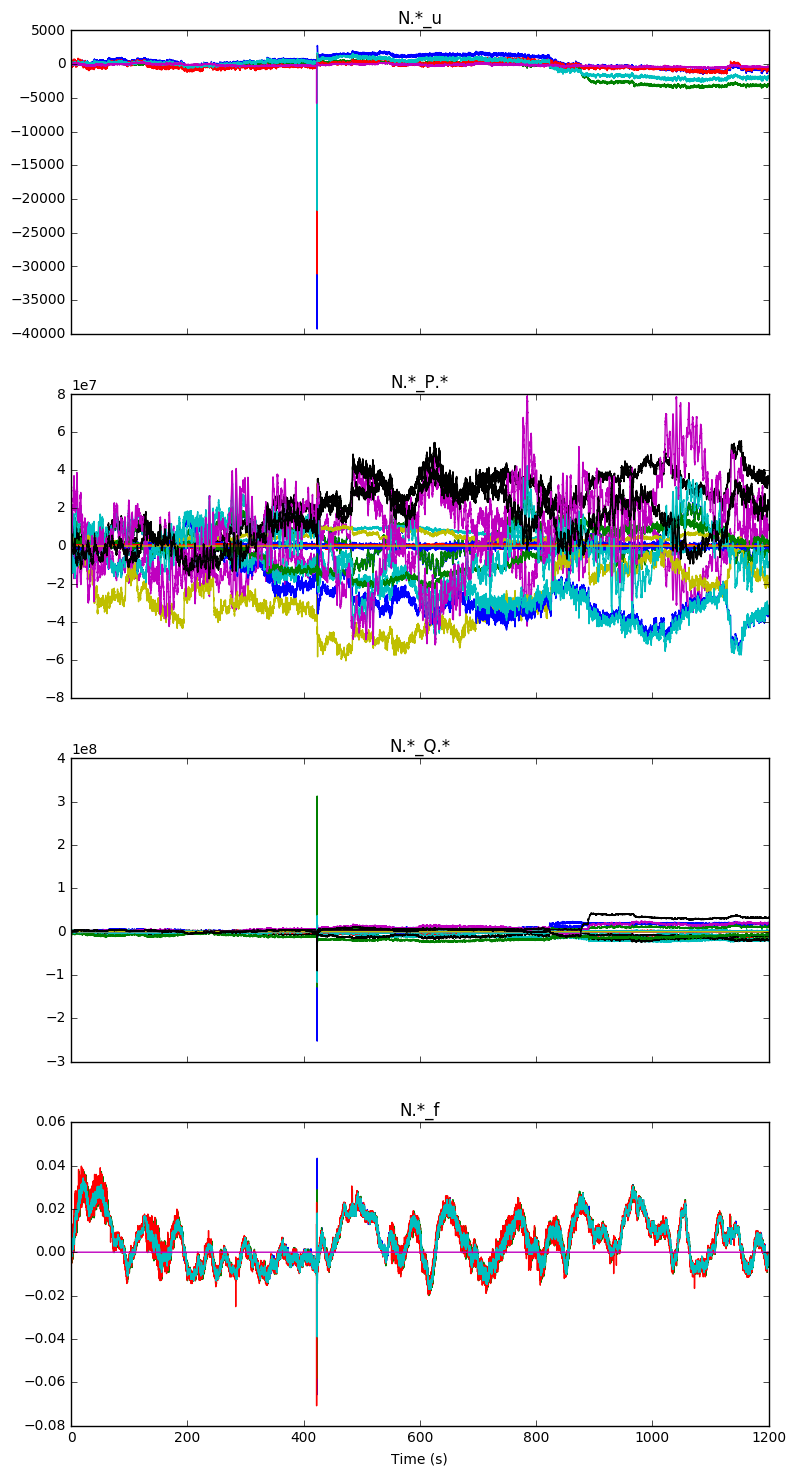

RealMeasurement5


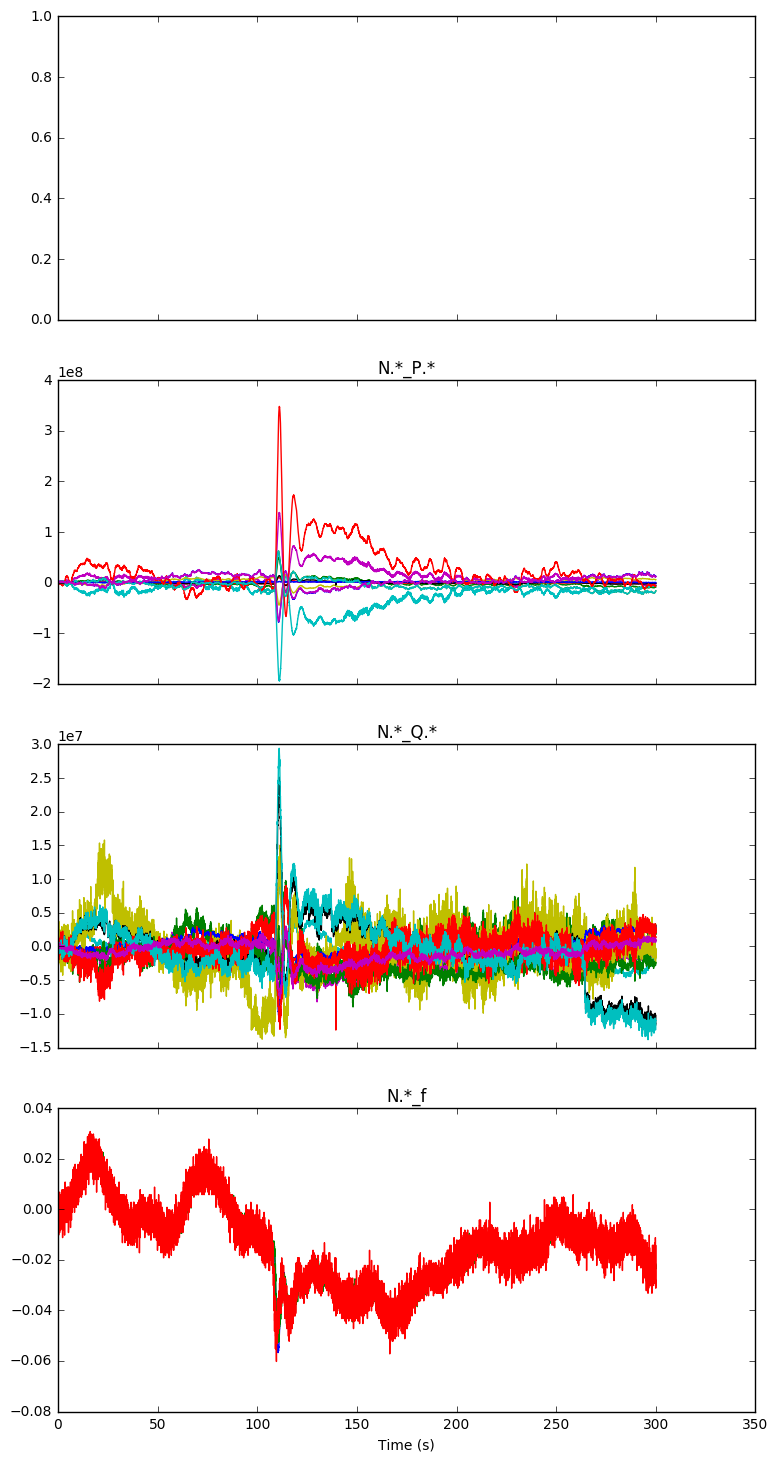

RealMeasurement6


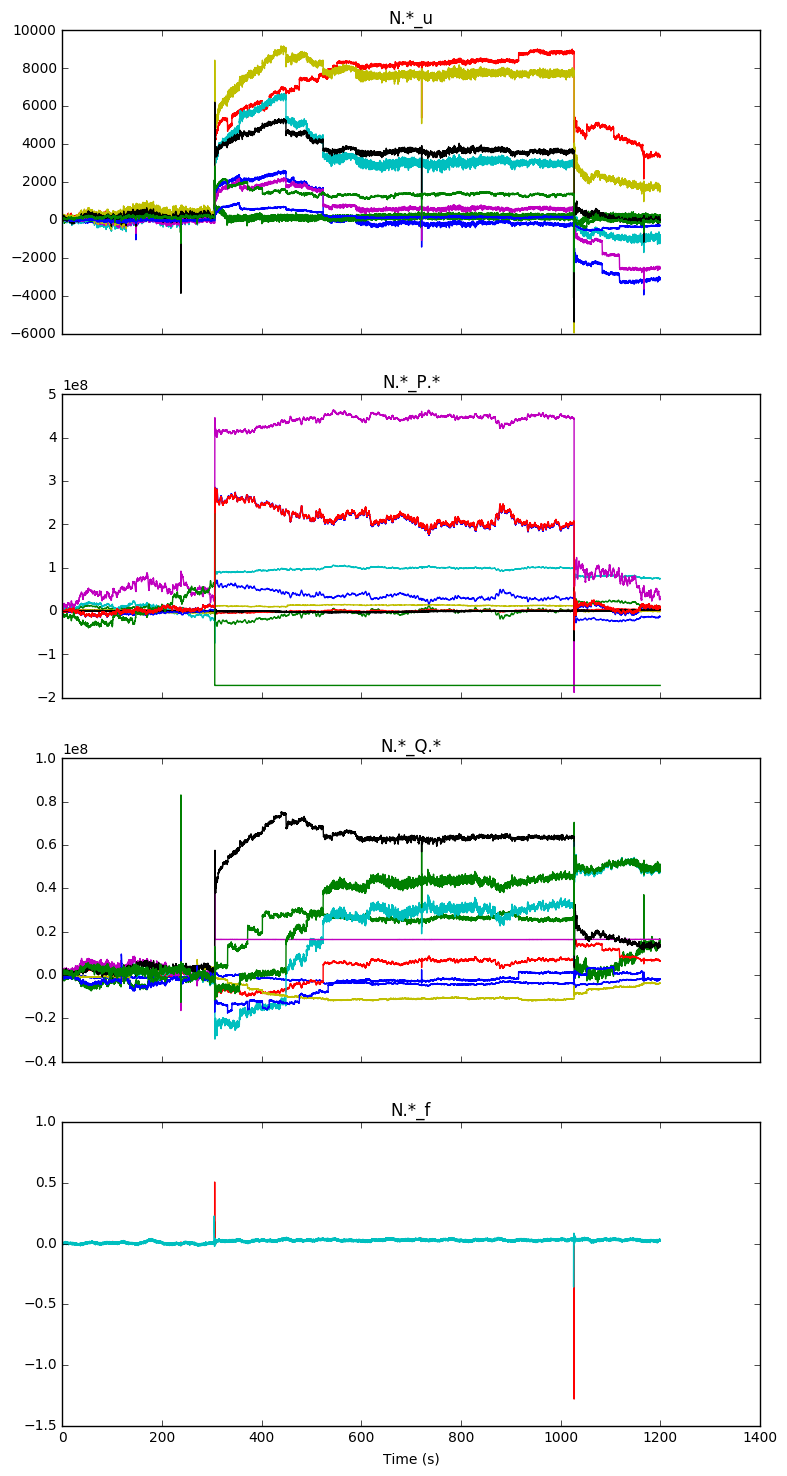

RealMeasurement7


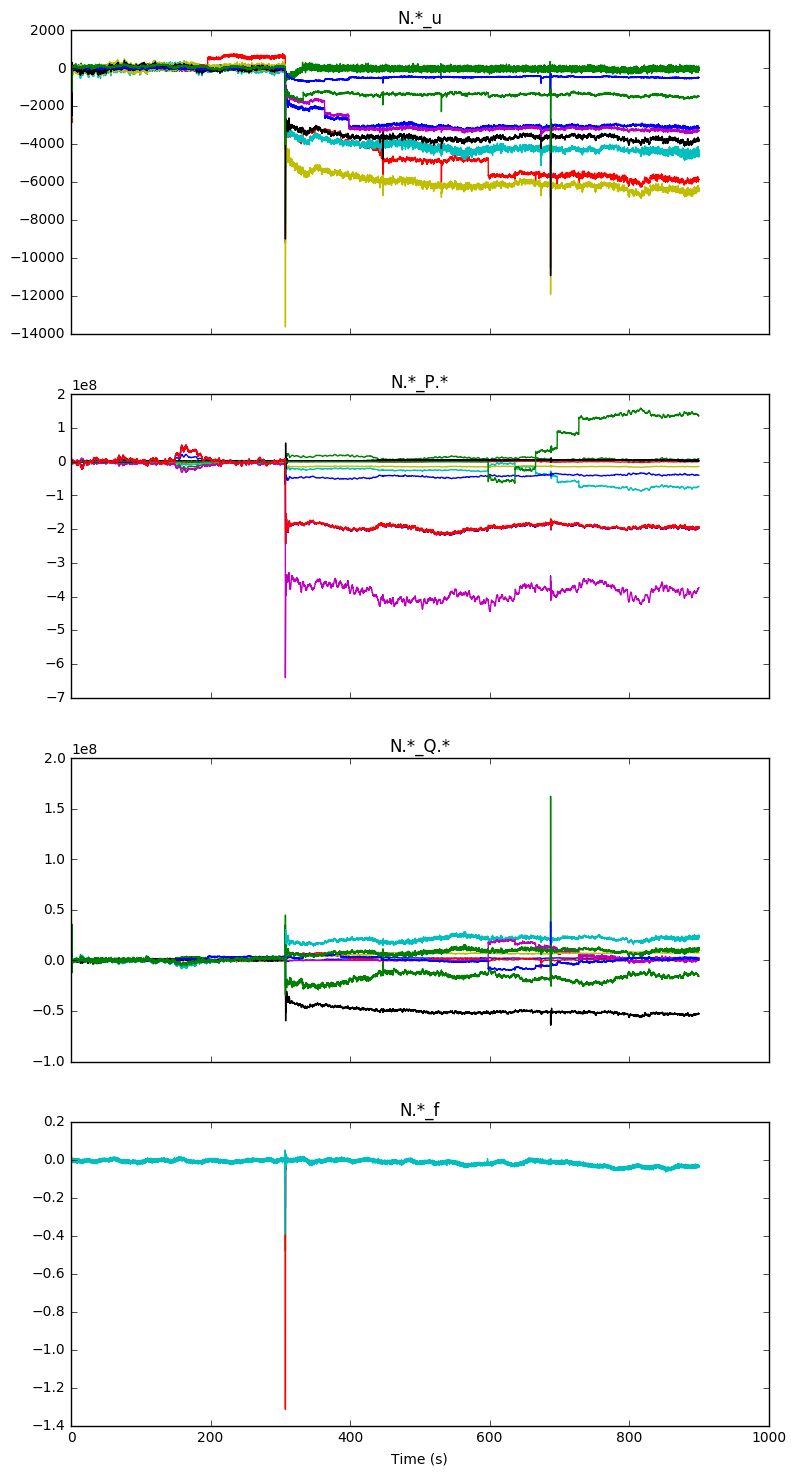

RealMeasurement9


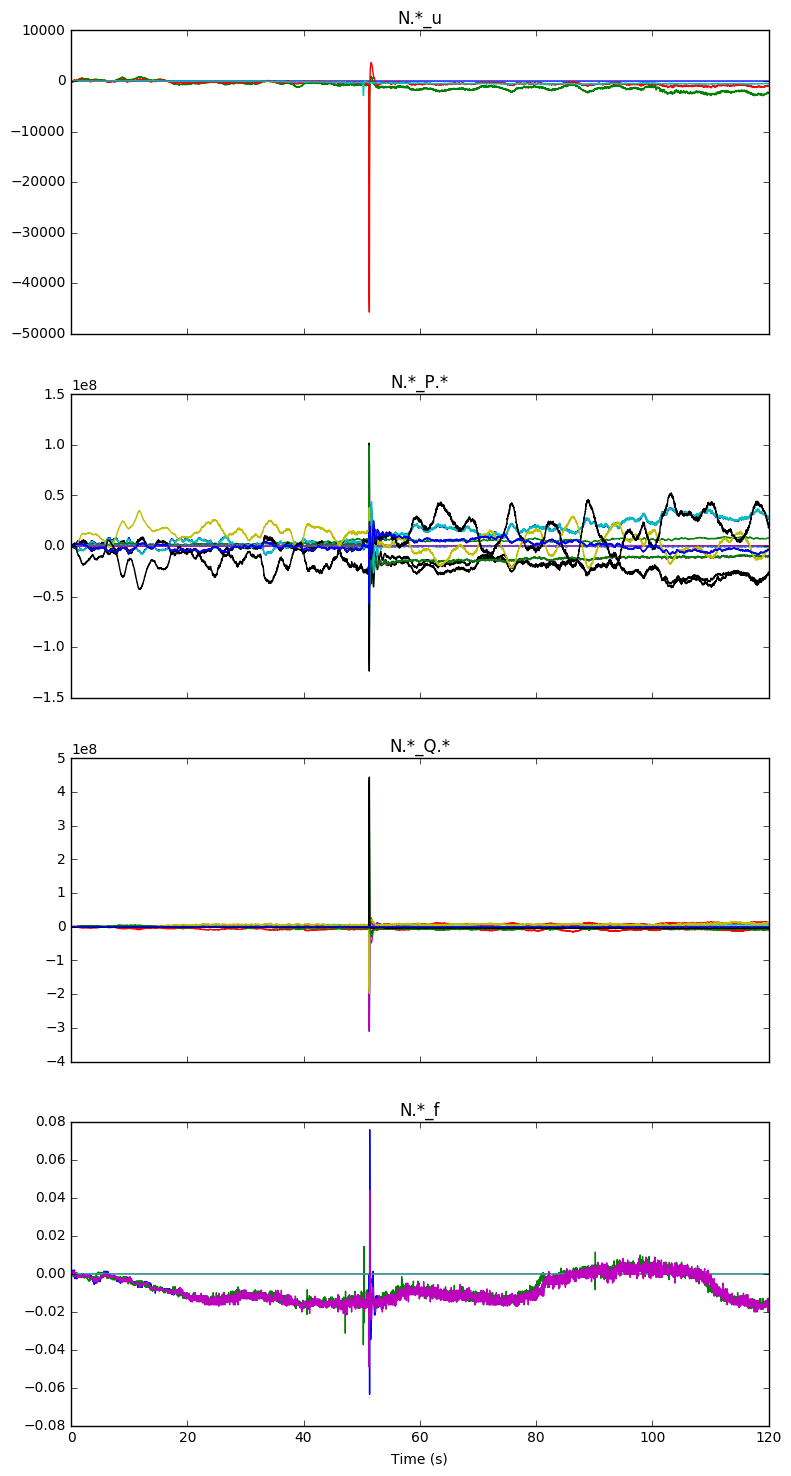

In [172]:
for n in range(len(file_names)):
    arr = []
    print(file_names[n][12:-4])

    with open(file_names[n]) as dat_f:
        reader = csv.DictReader(dat_f, delimiter=";")
        for row in reader:
            arr.append(row)
        
    data = dict()
    time_arr = []
    err_i = 0
    for key in arr[0]:
         data[key] = np.zeros(len(arr))

    for i,line in enumerate(arr):
        for key in arr[0]:
            if key == 'Time':
                t = datetime.strptime(line[key], '%Y-%m-%d %H:%M:%S.%f')
                t = t - datetime(2017,1,1)
                t = t.total_seconds()
                time_arr.append(t)
            else:
                try:
                    data[key][i] = float(line[key])
                except ValueError:
                    #print(i, "'"+line[key]+"'")
                    data[key][i] = 'NaN'
                    err_i += 1
    regex_vzorec = ["N.*_u", "N.*_P.*", "N.*_Q.*", "N.*_f"]



    f, axarr = plt.subplots(len(regex_vzorec), sharex=True, figsize=(9,18))


    for i, vzorec in enumerate(regex_vzorec):
        reg = re.compile(vzorec)

        plt_keys = list(filter(reg.match, data.keys()))


    

        for key in plt_keys:
            if vzorec.split('_')[1][0] == 'a':
                y = np.unwrap(data[key]-np.mean(data[key][0:10]), discont=359)
            else:
                y = data[key]-np.mean(data[key][0:50])
            axarr[i].plot(time_arr, y, '-', label=key)
            axarr[i].set_title(vzorec)
        
    
    plt.xlabel("Time (s)")
    plt.savefig(file_names[n][12:-4]+'.png')

    plt.show()

0


['N10_u', 'N3_u', 'N1_u', 'N4_u']
['N4_au', 'N1_au', 'N10_au']
['N3_i2', 'N10_i2', 'N3_i3', 'N1_i1', 'N2_i5', 'N2_i6', 'N2_i2', 'N4_i4', 'N3_i1', 'N1_i3', 'N2_i1', 'N10_i1', 'N3_i4', 'N1_i2', 'N2_i3', 'N4_i1', 'N2_i4', 'N4_i2', 'N1_i4', 'N10_i4', 'N10_i3', 'N4_i3']
['N2_ai4', 'N3_ai2', 'N2_ai5', 'N10_ai4', 'N3_ai4', 'N10_ai3', 'N4_ai4', 'N1_ai2', 'N4_ai2', 'N10_ai2', 'N2_ai3', 'N2_ai6', 'N10_ai1', 'N3_ai', 'N3_ai1', 'N4_ai3', 'N2_ai2', 'N1_ai3', 'N3_ai3', 'N1_ai1', 'N1_ai4', 'N2_ai1', 'N4_ai1']
['N10_P3', 'N3_P3', 'N1_P3', 'N3_P2', 'N2_P6', 'N1_P4', 'N2_P4', 'N10_P4', 'N2_P1', 'N1_P2', 'N2_P2', 'N4_P3', 'N10_P1', 'N2_P5', 'N4_P2', 'N2_P3', 'N1_P1', 'N10_P2', 'N4_P4', 'N4_P1', 'N3_P1', 'N3_P4']
['N10_Q1', 'N2_Q2', 'N2_Q5', 'N2_Q6', 'N2_Q3', 'N3_Q4', 'N10_Q3', 'N1_Q1', 'N4_Q1', 'N4_Q2', 'N3_Q1', 'N10_Q4', 'N2_Q1', 'N1_Q4', 'N1_Q3', 'N3_Q3', 'N3_Q2', 'N4_Q4', 'N1_Q2', 'N2_Q4', 'N10_Q2', 'N4_Q3']
['N1_f', 'N4_f', 'N10_f', 'N3_f', 'N2_f']
['N3_r', 'N1_r', 'N4_r', 'N10_r', 'N2_r']


In [202]:
file_dir = "D:/tmp/Real/"
#file_dir = "../data/Simul"
file_names = []
for entry in os.scandir(file_dir):
    if entry.is_file():
#         print(int(re.findall(r'\d+', entry.name)[0]))
#         print(entry.name)
        file_names.append(os.path.join(file_dir, entry.name))
print(file_names)

['D:/tmp/Real/RealMeasurement1.csv', 'D:/tmp/Real/RealMeasurement10.csv', 'D:/tmp/Real/RealMeasurement11.csv', 'D:/tmp/Real/RealMeasurement2.csv', 'D:/tmp/Real/RealMeasurement3.csv', 'D:/tmp/Real/RealMeasurement4.csv', 'D:/tmp/Real/RealMeasurement5.csv', 'D:/tmp/Real/RealMeasurement6.csv', 'D:/tmp/Real/RealMeasurement7.csv', 'D:/tmp/Real/RealMeasurement9.csv']


RealMeasurement1
[48]


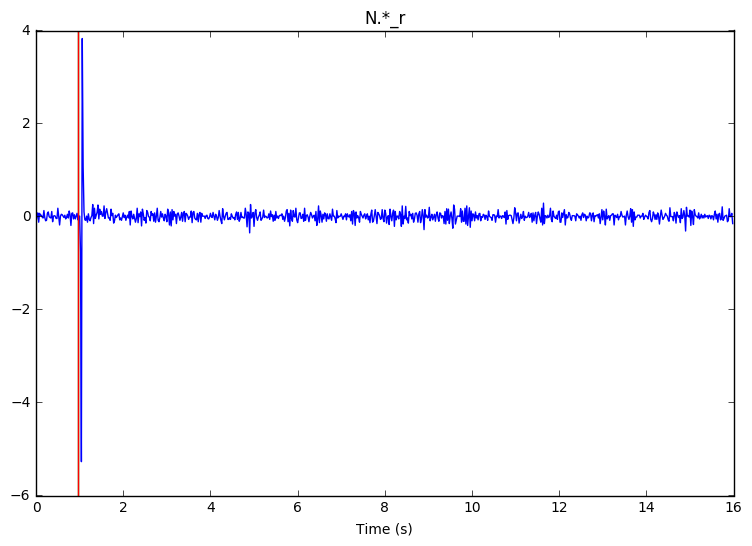

RealMeasurement10
[5898]


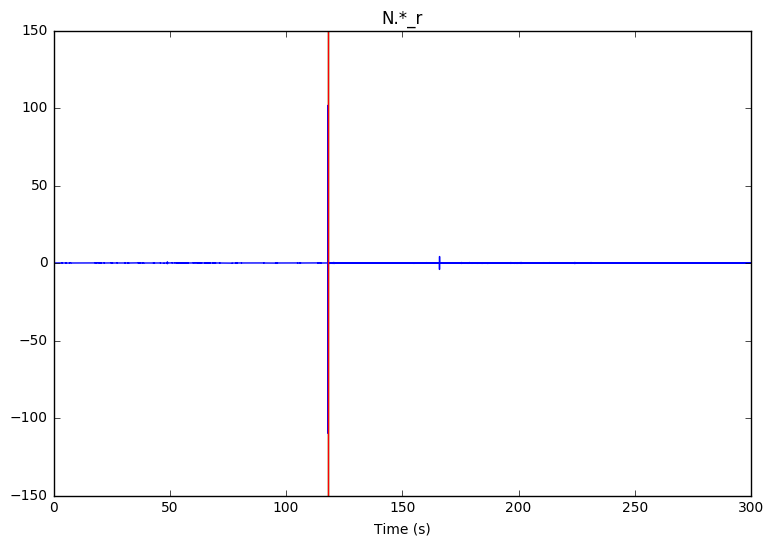

RealMeasurement11
[]


c:\program files\python35\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
c:\program files\python35\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


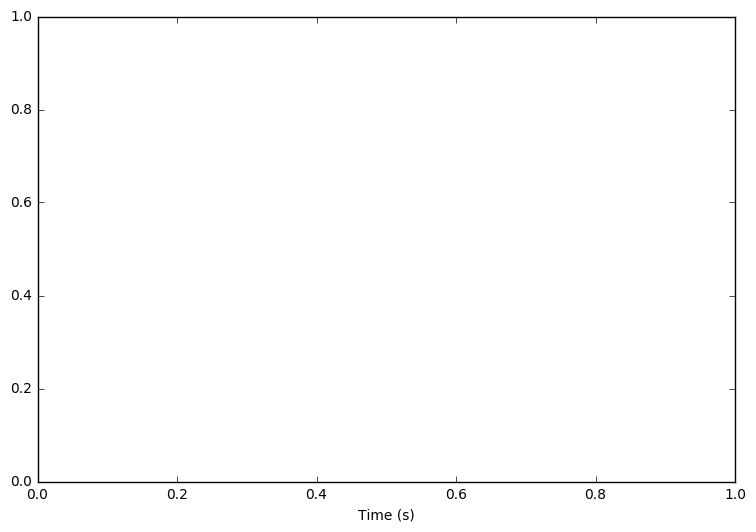

RealMeasurement2
[44997, 44997, 44997, 44997, 44997]


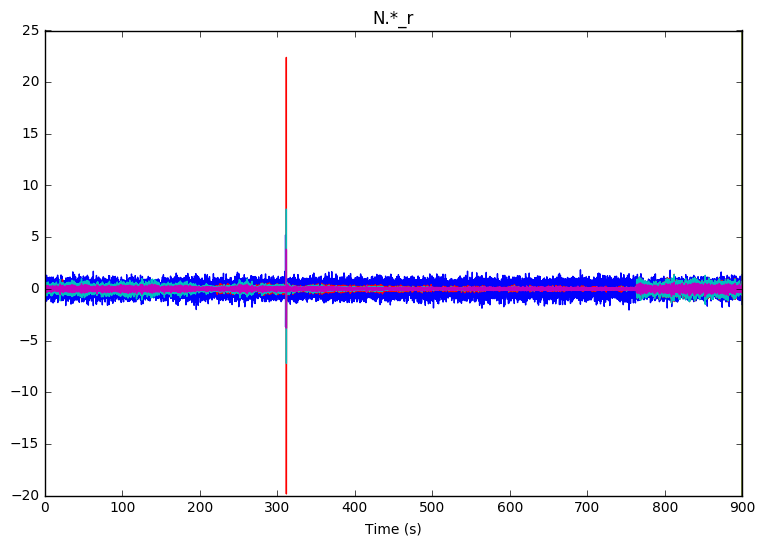

RealMeasurement3
[29997, 29997, 29997, 29997, 29997]


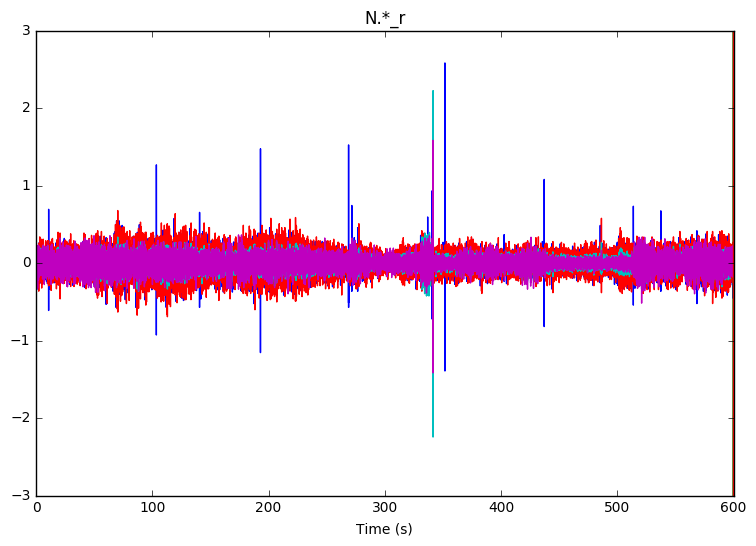

RealMeasurement4
[21118, 21167, 21168, 21168, 4]


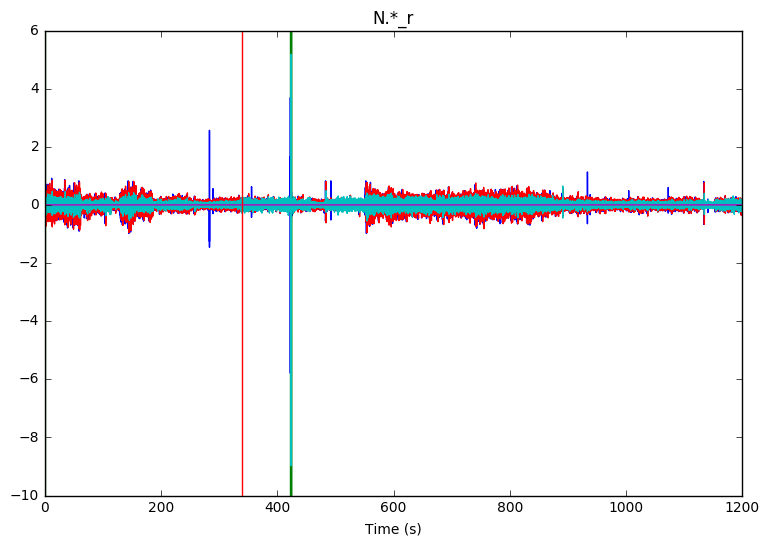

RealMeasurement5
[]


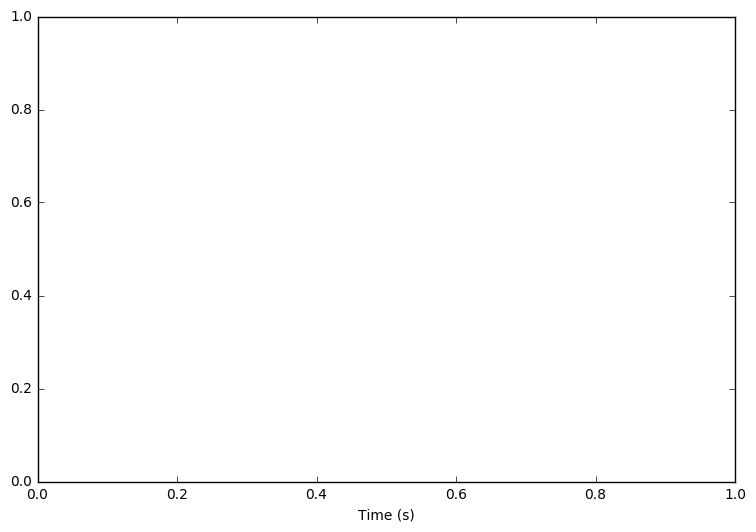

RealMeasurement6
[]


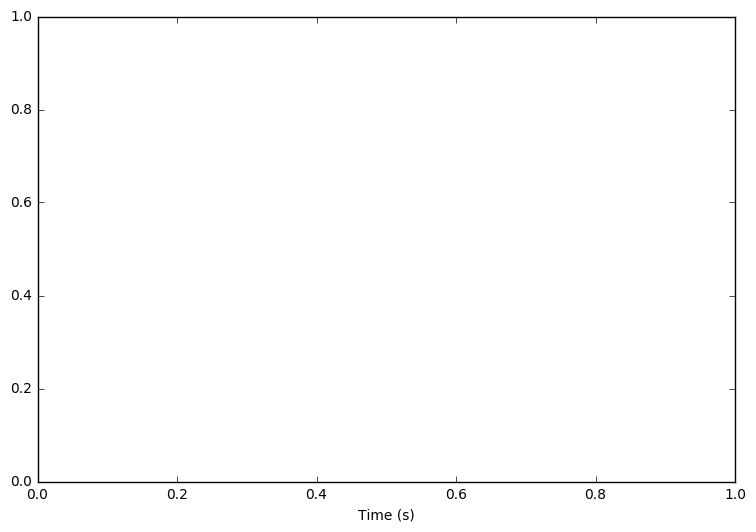

RealMeasurement7
[]


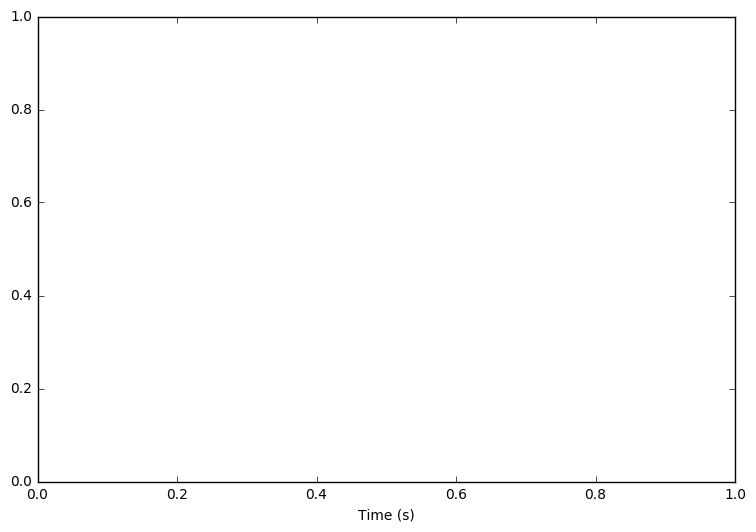

RealMeasurement9
[4, 2524, 4, 2574, 2574]


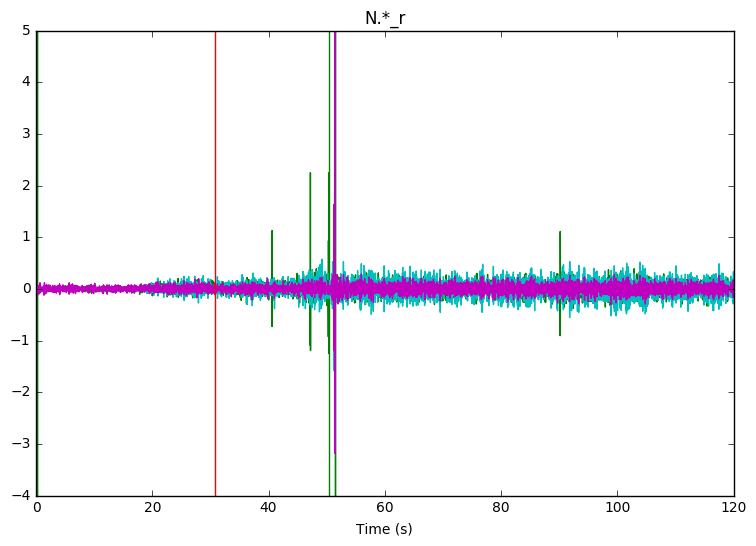

In [214]:
for n in range(len(file_names)):
    arr = []
    print(file_names[n][12:-4])

    with open(file_names[n]) as dat_f:
        reader = csv.DictReader(dat_f, delimiter=";")
        for row in reader:
            arr.append(row)
        
    data = dict()
    time_arr = []
    err_i = 0
    for key in arr[0]:
         data[key] = np.zeros(len(arr))

    for i,line in enumerate(arr):
        for key in arr[0]:
            if key == 'Time':
                t = datetime.strptime(line[key], '%Y-%m-%d %H:%M:%S.%f')
                t = t - datetime(2017,1,1)
                t = t.total_seconds()
                time_arr.append(t)
            else:
                try:
                    data[key][i] = float(line[key])
                except ValueError:
                    #print(i, "'"+line[key]+"'")
                    data[key][i] = 'NaN'
                    err_i += 1
    regex_vzorec = ["N.*_r"]



    fig = plt.figure(figsize=(9,6))


    for i, vzorec in enumerate(regex_vzorec):
        reg = re.compile(vzorec)

        plt_keys = list(filter(reg.match, data.keys()))


        maxpos= []

        for key in plt_keys:
            
            

            convolved = np.convolve(np.ones(2*5-1), data[key], 'same')
            maxpos.append(np.argmax(np.absolute(convolved)))
            plt.axvline(time_arr[np.argmax(np.absolute(convolved))], color='green')
                    

            y = data[key]-np.mean(data[key][0:50])
            
            plt.plot(time_arr, y, '-', label=key)
            
            plt.title(vzorec)
     
    print(maxpos)
    try:
        plt.axvline(time_arr[int(np.mean(maxpos))], color='red')
    except: pass
    
    plt.xlabel("Time (s)")

    plt.show()